In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
import matplotlib.pyplot as mpl
import numpy as npy


In [2]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
len(X_train), len(X_test)  # Number of training and test samples


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 10000)

(60000, 28, 28)

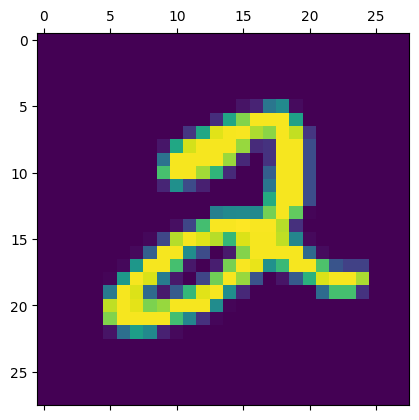

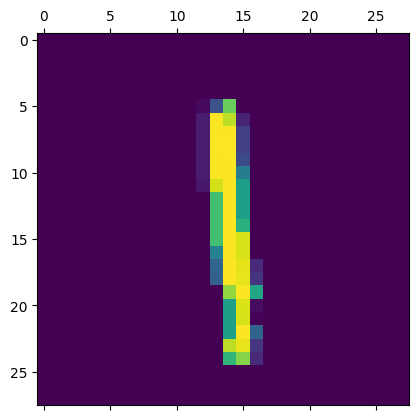

In [3]:
X_train[0]  # Inspect the first image
X_train[7].shape  # Shape of the image
mpl.matshow(X_train[5])  # Visualize the 6th image
mpl.matshow(X_train[8])  # Visualize the 9th image
Y_train[:9]  # Display the labels for the first 9 samples
X_train.shape  # Shape of the training dataset


In [11]:
X_train = X_train / 255  # Normalize pixel values to [0, 1]
X_test = X_test / 255
X_train_flattened = X_train.reshape(len(X_train), 28*28)  # Flatten images
X_test_flattened = X_test.reshape(len(X_test), 28*28)
X_train_flattened.shape  # Shape of flattened training data
X_train_flattened[2]  # Display flattened version of the 3rd image


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
# Define the model
input_layer = Input(shape=(28*28,))  # Input shape as a tuple
hidden_layer = Dense(500, activation='sigmoid')(input_layer)  # Hidden layer with 500 neurons and sigmoid activation
output_layer = Dense(10, activation='softmax')(hidden_layer)  # Output layer with 10 neurons for 10 classes
model = Model(inputs=input_layer, outputs=output_layer)


In [17]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [18]:
model.fit(X_train_flattened, Y_train, epochs=10)  # Training the model for 10 epochs


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.8586 - loss: 0.5137
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9454 - loss: 0.1860
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9662 - loss: 0.1164
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9774 - loss: 0.0794
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9822 - loss: 0.0581
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9874 - loss: 0.0431
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.9910 - loss: 0.0315
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9939 - loss: 0.0219
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.9961 - loss: 0.0158
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9976 - loss: 0.0114


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9771 - loss: 0.0738
Test accuracy: 0.9804999828338623
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


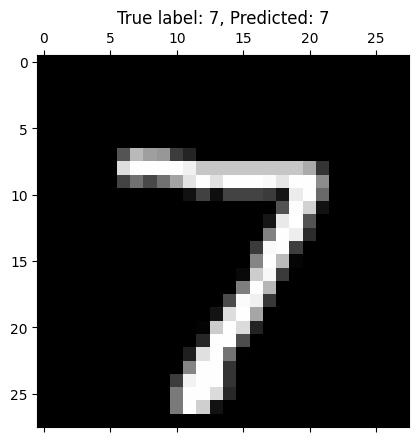

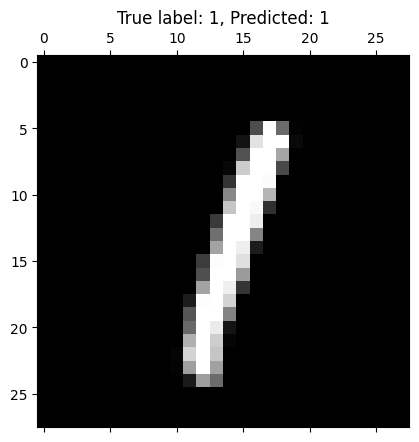

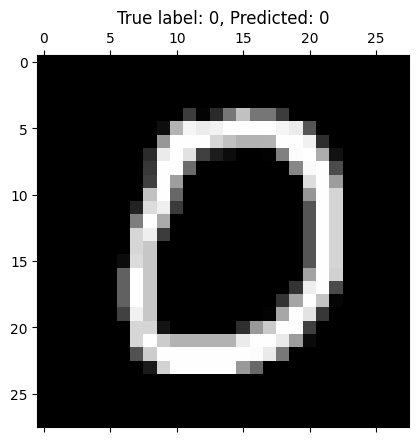

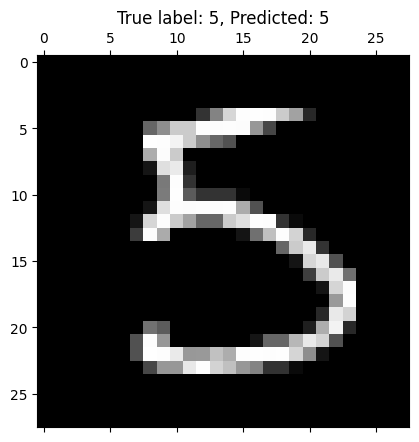

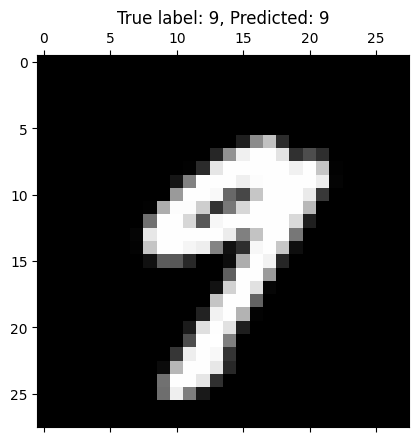

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_flattened, Y_test)
print(f"Test accuracy: {test_accuracy}")

# Predict on test data
Y_predicted = model.predict(X_test_flattened)

# Display predictions for some test images
for i in [0, 5, 10, 15, 20]:
    plt.matshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True label: {Y_test[i]}, Predicted: {np.argmax(Y_predicted[i])}")
    plt.show()

In [ ]:
\